In [1]:
import os
import cv2
import glob
import h5py
import pickle
import numpy as np
import pandas as pd
from bdpy import BData
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

### data exploration

In [2]:
fname = "kay_images.npz"
with np.load(fname) as dobj:
    dat = dict(**dobj)

In [3]:
dat.keys()

dict_keys(['stimuli', 'stimuli_test', 'responses', 'responses_test', 'roi', 'roi_names'])

In [4]:
dat['responses'][0], dat['roi'][0], dat['roi_names'][0]

(array([ 0.53109303, -0.1711666 , -2.18185285, ..., -0.08087291,
        -0.07181383, -1.14688391]),
 3,
 'Other')

In [5]:
dat['responses'][0].min(), dat['responses'][0].max()

(-4.18787191803876, 3.2694566405705783)

In [6]:
set(dat['roi']), dat['roi_names']

({1, 2, 3, 4, 5, 6, 7},
 array(['Other', 'V1', 'V2', 'V3', 'V3A', 'V3B', 'V4', 'LatOcc'],
       dtype='<U6'))

In [7]:
# responses per voxels` region
i = 1
idx = np.where(dat["roi"] == i)[0]
dat_area = dat["responses"][:, idx]
dat_area.shape, idx

((1750, 1294), array([ 187,  199,  213, ..., 8281, 8331, 8355], dtype=int64))

In [8]:
dat['roi'].shape, dat['responses'].shape, dat['roi_names'], set(dat['roi'])

((8428,),
 (1750, 8428),
 array(['Other', 'V1', 'V2', 'V3', 'V3A', 'V3B', 'V4', 'LatOcc'],
       dtype='<U6'),
 {1, 2, 3, 4, 5, 6, 7})

(array([  1.,   0.,   0.,   1.,   0.,   1.,   0.,   2.,   1.,   1.,   2.,
          1.,   2.,   3.,   9.,   6.,  11.,  15.,  16.,  22.,  22.,  47.,
         57.,  85.,  99., 119., 131., 182., 208., 225., 306., 307., 323.,
        394., 401., 409., 469., 430., 403., 444., 413., 396., 371., 306.,
        270., 271., 216., 215., 156., 124., 108., 100.,  95.,  42.,  63.,
         27.,  27.,  21.,  14.,   7.,  10.,  10.,   3.,   4.,   0.,   2.,
          0.,   0.,   2.]),
 array([-4.18787192, -4.07979469, -3.97171747, -3.86364024, -3.75556302,
        -3.64748579, -3.53940857, -3.43133134, -3.32325411, -3.21517689,
        -3.10709966, -2.99902244, -2.89094521, -2.78286799, -2.67479076,
        -2.56671354, -2.45863631, -2.35055908, -2.24248186, -2.13440463,
        -2.02632741, -1.91825018, -1.81017296, -1.70209573, -1.59401851,
        -1.48594128, -1.37786406, -1.26978683, -1.1617096 , -1.05363238,
        -0.94555515, -0.83747793, -0.7294007 , -0.62132348, -0.51324625,
        -0.405169

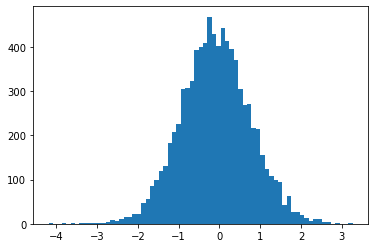

In [9]:
plt.hist(dat['responses'][0], bins='auto')

### create & manipulate responses data for training process

In [10]:
responses_extraction = list()
thresh = 0

for i, r in tqdm_notebook(enumerate(dat['responses'])):
#     responses_extraction.append((np.array([0 if r_ < thresh else r_ for r_ in r]), dat['roi'][i]))
    responses_extraction.append((r, dat['roi'][i]))
#     responses_extraction.append((np.array([0 if -thresh < r_ < thresh else r_ for r_ in r]), dat['roi'][i]))
#     responses_extraction.append((r**3, dat['roi'][i]))

C:\Users\zkalyuzhner\.conda\envs\neurot\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [11]:
with open("kay_data/kay_brain_responses_roi_list.pickle", "wb") as fp:
    pickle.dump(responses_extraction, fp)

In [12]:
responses_extraction = list()
thresh = 0

for i, r in tqdm_notebook(enumerate(dat['responses_test'])):
#     responses_extraction.append((np.array([0 if r_ < thresh else r_ for r_ in r]), dat['roi'][i]))
    responses_extraction.append((r, dat['roi'][i]))
#     responses_extraction.append((np.array([0 if -thresh < r_ < thresh else r_ for r_ in r]), dat['roi'][i]))
#     responses_extraction.append((r**3, dat['roi'][i]))

C:\Users\zkalyuzhner\.conda\envs\neurot\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [13]:
with open("kay_data/kay_brain_responses_test_roi_list.pickle", "wb") as fp:
    pickle.dump(responses_extraction, fp)

C:\Users\zkalyuzhner\.conda\envs\neurot\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([[  1.,   0.,   1.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,
           2.,   1.,   3.,   3.,   3.,   3.,   3.,   9.,   8.,   4.,  16.,
          15.,  22.,  17.,  24.,  27.,  47.,  47.,  57.,  64.,  80., 100.,
          93., 123., 142., 167., 215., 241., 280., 321., 325., 362., 386.,
         440., 473., 463., 471., 449., 387., 361., 348., 313., 257., 206.,
         177., 168., 140., 110.,  87.,  62.,  54.,  43.,  43.,  36.,  23.,
          18.,  12.,  14.,   8.,  13.,   4.,   2.,   5.,   5.,   3.,   1.,
           4.,   4.,   2.,   1.,   4.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   1.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0

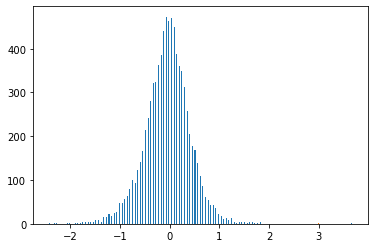

In [14]:
plt.hist(responses_extraction[10], bins='auto')